In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
lc=pd.read_table('./Lending Club/accepted loans reduced set.csv',on_bad_lines='skip',sep=",")

In [4]:
print(lc.isnull().sum())

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
                             ..
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
disbursement_method           0
debt_settlement_flag          0
Length: 76, dtype: int64


In [5]:
lc['loan_status'].value_counts()

Fully Paid            45324
Charged Off           12382
Late (31-120 days)     1160
In Grace Period         411
Late (16-30 days)       216
Name: loan_status, dtype: int64

In [6]:
lc=lc.replace('Fully Paid',1)
lc=lc.replace(['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)'],0)
lc['loan_status'].value_counts()

1    45324
0    14169
Name: loan_status, dtype: int64

In [7]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59493 entries, 0 to 59492
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       59493 non-null  int64  
 1   term                            59493 non-null  object 
 2   int_rate                        59493 non-null  float64
 3   installment                     59493 non-null  float64
 4   grade                           59493 non-null  object 
 5   sub_grade                       59493 non-null  object 
 6   emp_title                       55543 non-null  object 
 7   emp_length                      55579 non-null  object 
 8   home_ownership                  59493 non-null  object 
 9   application_type                59493 non-null  object 
 10  annual_inc                      59493 non-null  float64
 11  verification_status             59493 non-null  object 
 12  issue_d                         

In [8]:
lc=lc.drop(columns=['emp_title','emp_length','last_pymnt_d','last_credit_pull_d','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_tl_120dpd_2m','percent_bc_gt_75'])

In [9]:
lc.fillna(method='bfill',inplace=True)

In [10]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59493 entries, 0 to 59492
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   59493 non-null  int64  
 1   term                        59493 non-null  object 
 2   int_rate                    59493 non-null  float64
 3   installment                 59493 non-null  float64
 4   grade                       59493 non-null  object 
 5   sub_grade                   59493 non-null  object 
 6   home_ownership              59493 non-null  object 
 7   application_type            59493 non-null  object 
 8   annual_inc                  59493 non-null  float64
 9   verification_status         59493 non-null  object 
 10  issue_d                     59493 non-null  object 
 11  loan_status                 59493 non-null  int64  
 12  Loan Purpose                59493 non-null  object 
 13  addr_state                  594

In [11]:
lc_pic=lc.copy(deep=True)
lc_pic=lc_pic[['term','grade','sub_grade','home_ownership','application_type','verification_status','issue_d','Loan Purpose','addr_state','DTI','earliest_cr_line','initial_list_status','disbursement_method','debt_settlement_flag','loan_status']]

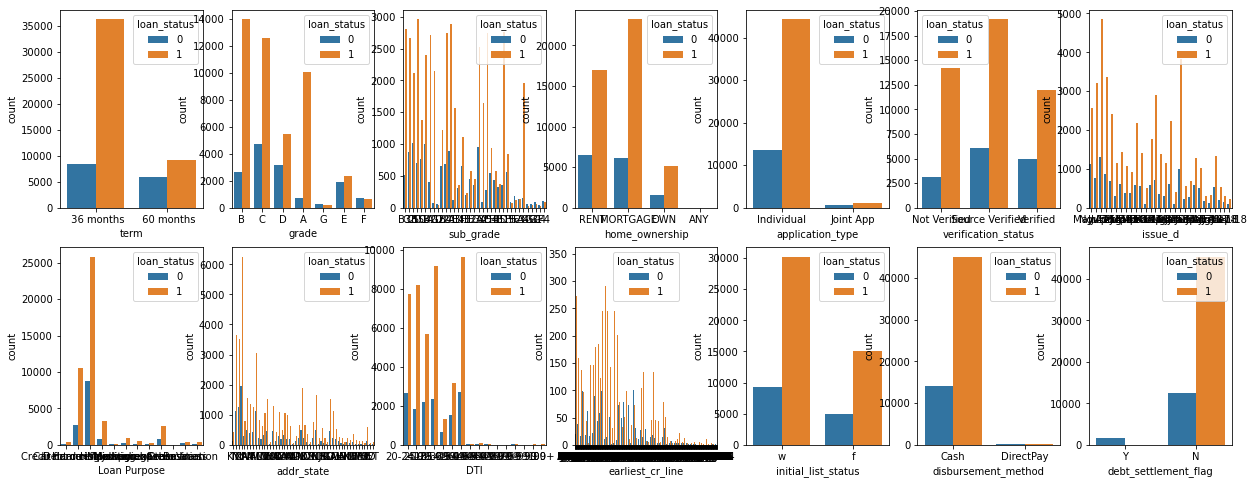

In [36]:
fig, ax = plt.subplots(2, 7, figsize=(21, 8))
for i in range(2):
    for j in range(7):
        sns.countplot(x=lc_pic.iloc[:,i*7+j], data=lc_pic, ax=ax[i,j],hue='loan_status')

In [12]:
lc_pic2=lc.copy(deep=True)
lc_pic2=lc_pic2.drop(columns=['term','grade','sub_grade','home_ownership','application_type','verification_status','issue_d','Loan Purpose','addr_state','DTI','earliest_cr_line','initial_list_status','disbursement_method','debt_settlement_flag','loan_status'])
lc_pic2['loan_status']=lc['loan_status']

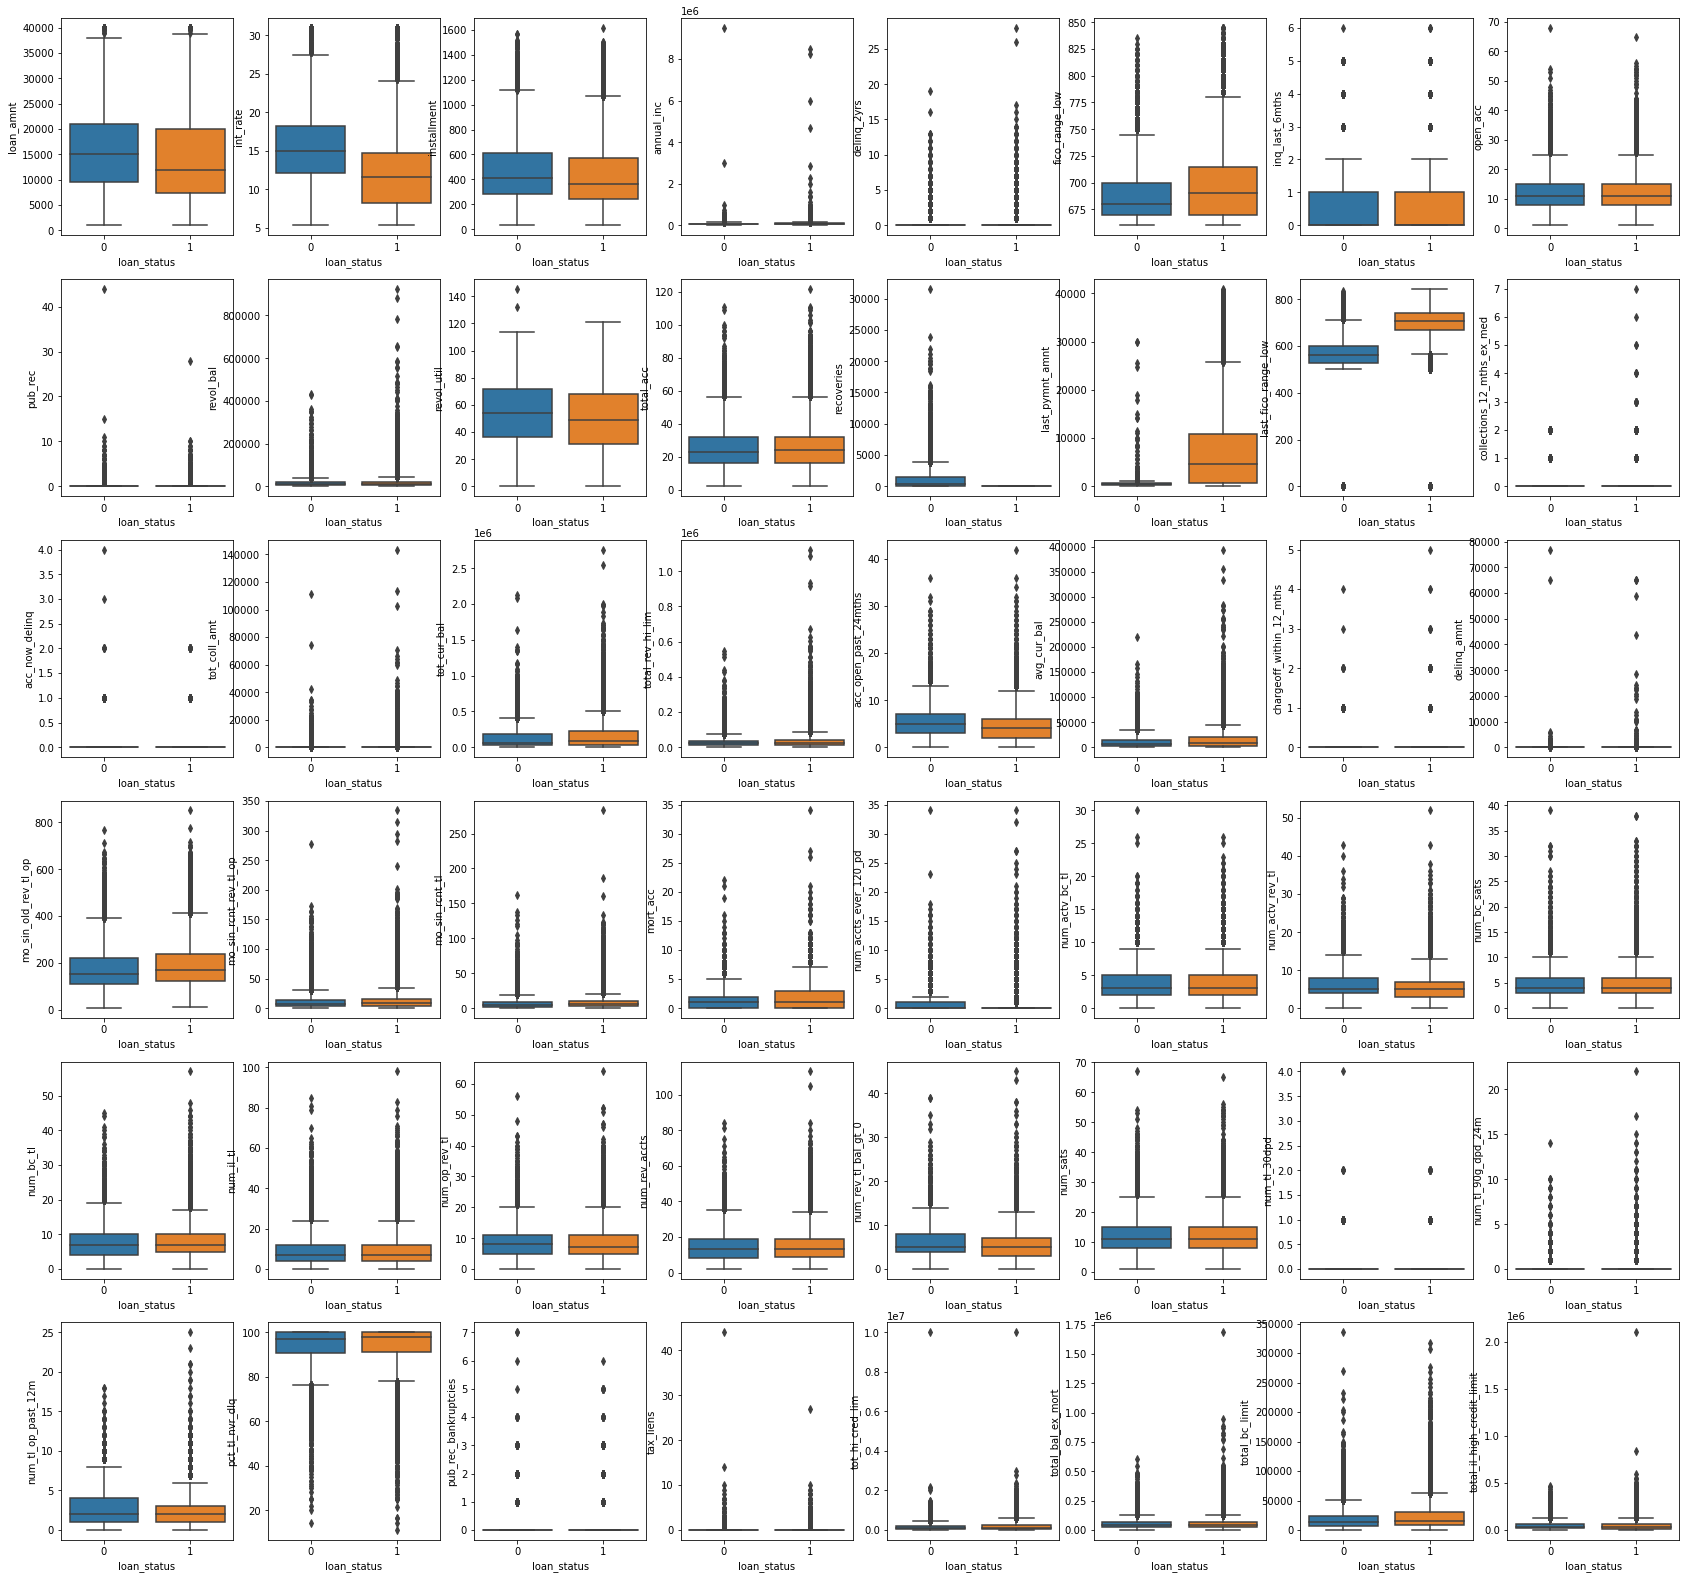

In [18]:
fig, ax = plt.subplots(6, 8, figsize=(29,28))
for i in range(6):
    for j in range(8):
        sns.boxplot(x='loan_status',y=lc_pic2.iloc[:,i*8+j], data=lc_pic2, ax=ax[i,j])

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [11]:
lc_pre=lc.copy(deep=True)
lc_pre=lc_pre.drop(columns=['loan_status'])
numer_lc=MinMaxScaler().fit_transform(lc_pre.select_dtypes(include='number'))
numer_lc=pd.DataFrame(numer_lc,columns = lc_pre.select_dtypes(include='number').columns)
#print(numer_ger)

cate_lc=pd.get_dummies(lc_pre.select_dtypes(exclude='number'))


scale_lc=pd.concat([numer_lc, cate_lc, lc[['loan_status']]], axis=1)
#scale_ger=StandardScaler().fit_transform(pd.concat([numer_ger, cate_ger, ger[['Label']]], axis=1))
#scale_ger=pd.DataFrame(scale_ger)
print(scale_lc)

       loan_amnt  int_rate  installment  annual_inc  delinq_2yrs  \
0       0.179487  0.236760     0.146904    0.004632     0.000000   
1       0.487179  0.283489     0.402932    0.015789     0.000000   
2       0.332692  0.363707     0.284613    0.006737     0.035714   
3       0.230769  0.242212     0.188795    0.006316     0.000000   
4       0.158974  0.401090     0.139573    0.004211     0.000000   
...          ...       ...          ...         ...          ...   
59488   0.282051  0.338006     0.156835    0.003323     0.000000   
59489   0.128205  0.496495     0.117752    0.009684     0.000000   
59490   0.230769  0.179907     0.114622    0.004908     0.000000   
59491   0.102564  0.534268     0.096504    0.014737     0.000000   
59492   0.102564  0.417056     0.091768    0.002526     0.000000   

       fico_range_low  inq_last_6mths  open_acc   pub_rec  revol_bal  ...  \
0            0.297297        0.000000  0.059701  0.000000   0.019736  ...   
1            0.216216        

In [12]:
from sklearn.ensemble import RandomForestClassifier
X, y = scale_lc.loc[:, np.delete(scale_lc.columns.values, 
                                        np.where(scale_lc.columns.values == ['loan_status']))], \
        scale_lc.loc[:, 'loan_status']

# train on randomForest to get important features
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y) 

feature_importances = pd.DataFrame(sorted(zip(scale_lc.columns, clf.feature_importances_), key=lambda x: x[1] * -1),
                                    columns = ['feature','importance'])


In [13]:
print(feature_importances)

                           feature  importance
0                  last_pymnt_amnt    0.126992
1           debt_settlement_flag_Y    0.095782
2              last_fico_range_low    0.067488
3                       recoveries    0.066204
4           debt_settlement_flag_N    0.046086
..                             ...         ...
840        earliest_cr_line_Sep-99    0.000000
841          initial_list_status_f    0.000000
842          initial_list_status_w    0.000000
843       disbursement_method_Cash    0.000000
844  disbursement_method_DirectPay    0.000000

[845 rows x 2 columns]


In [15]:
top_features = feature_importances[feature_importances.importance>0]['feature'].values

X, y = scale_lc.loc[:,top_features], scale_lc.loc[:,'loan_status']

In [17]:
print(top_features)

['last_pymnt_amnt' 'debt_settlement_flag_Y' 'last_fico_range_low'
 'recoveries' 'debt_settlement_flag_N' 'fico_range_low' 'int_rate'
 'installment' 'term_ 36 months' 'grade_F' 'grade_B' 'sub_grade_A4'
 'term_ 60 months' 'revol_util' 'grade_A' 'grade_D'
 'verification_status_Not Verified' 'total_rev_hi_lim' 'grade_E'
 'tot_cur_bal' 'grade_G' 'sub_grade_A5' 'sub_grade_D3' 'avg_cur_bal'
 'tot_hi_cred_lim' 'sub_grade_F1' 'num_rev_tl_bal_gt_0'
 'verification_status_Verified' 'home_ownership_MORTGAGE' 'sub_grade_B2'
 'sub_grade_A1' 'home_ownership_RENT' 'num_tl_op_past_12m' 'loan_amnt'
 'sub_grade_A3' 'acc_open_past_24mths' 'sub_grade_D5'
 'application_type_Joint App' 'mort_acc' 'sub_grade_B1' 'sub_grade_E3'
 'sub_grade_F2' 'sub_grade_E2' 'sub_grade_E5' 'total_bc_limit'
 'mo_sin_rcnt_tl' 'issue_d_May-17' 'sub_grade_F5' 'sub_grade_F3'
 'sub_grade_C5' 'sub_grade_G5' 'DTI_30-34.99' 'DTI_<10'
 'mo_sin_old_rev_tl_op' 'grade_C' 'sub_grade_B4' 'inq_last_6mths'
 'num_sats' 'sub_grade_A2' 'sub_grade_

In [16]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score,StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify = y)
sm = SMOTE(random_state=0,sampling_strategy=1)
x_train_b, y_train_b = sm.fit_resample(x_train, y_train.ravel())

In [16]:
unique, counts = np.unique(y_train_b, return_counts=True)
dict(zip(unique, counts))

{0: 36259, 1: 36259}

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, recall_score, precision_score,make_scorer,confusion_matrix,brier_score_loss,accuracy_score
from sklearn import metrics
from scipy.stats import ks_2samp

In [18]:
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

In [19]:
def type2_calcu(y,yhat):
    confusion =confusion_matrix(y,yhat)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    return FP / float(FP + TN)
def type1_calcu(y,yhat):
    confusion =confusion_matrix(y,yhat)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    return FN / float(TP + FN)

In [20]:
import xgboost as xgb
import lightgbm as lgb

In [21]:
def scores(model):
    train=[]
    test=[]
    y_train_c=model.predict(x_train)
    y_train_pre=model.predict_proba(x_train)
    y_pred_c=model.predict(x_test)
    y_pred = model.predict_proba(x_test)
    #roc
    train.append(roc_auc_score(y_train,y_train_pre[:,1]))
    test.append(roc_auc_score(y_test, y_pred[:, 1]))
    #ks
    train.append(ks_stat(y_train,y_train_pre[:,1]))
    test.append(ks_stat(y_test, y_pred[:, 1]))
    #brier
    train.append(brier_score_loss(y_train,y_train_pre[:,1]))
    test.append(brier_score_loss(y_test, y_pred[:, 1]))
    #acc
    train.append(accuracy_score(y_train,y_train_c))
    test.append(accuracy_score(y_test, y_pred_c))
    #t1
    train.append(type1_calcu(y_train,y_train_c))
    test.append(type1_calcu(y_test, y_pred_c))
    #t2
    train.append(type2_calcu(y_train,y_train_c))
    test.append(type2_calcu(y_test, y_pred_c))
    return train,test

In [22]:
x_train.columns[x_train.columns.str.contains("[\[\]<]")]

Index(['DTI_<10'], dtype='object')

In [23]:

x_train=x_train.drop(columns=['DTI_<10'])
x_test=x_test.drop(columns=['DTI_<10'])

In [24]:
models=[]
xgb_params = {'learning_rate': [0.01],'max_depth': [10,20,40,50],'subsample': [0.5,0.7]}
svc_params = {'kernel':['linear'], 'C':[1]}
lr_params={'penalty':('l1','l2'),'C':np.logspace(-2,2,10,base=10)}
dt_params={'max_depth':[2,4,6,8,10,12],'min_samples_leaf':[1,3,5,7]}
rf_params={'max_depth': [2,8,10,14],'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators':[1,5,10,15,20]}
nb_p={}
models.append(('svc',svc_params,SVC(probability=True,max_iter=100)))
models.append(('xgb',xgb_params,xgb.XGBClassifier()))
models.append(('LR',lr_params,LogisticRegression()))
models.append(('DT',dt_params,DecisionTreeClassifier()))
models.append(('RF',rf_params,RandomForestClassifier()))
models.append(('nb',nb_p,GaussianNB()))

results=[]
for model_name, parameters, model in models:
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1234)
    clf = GridSearchCV(model, parameters, cv=skf,scoring='roc_auc')
    clf.fit(x_train, y_train)
    print('For ',model_name,', the best parameters: ', clf.best_params_)
    results.append(scores(clf))
    
results=pd.DataFrame(results)
print(results)

/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


For  svc , the best parameters:  {'C': 1, 'kernel': 'linear'}
For  xgb , the best parameters:  {'learning_rate': 0.01, 'max_depth': 20, 'subsample': 0.5}


/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For  LR , the best parameters:  {'C': 100.0, 'penalty': 'l2'}
For  DT , the best parameters:  {'max_depth': 6, 'min_samples_leaf': 7}
For  RF , the best parameters:  {'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}
For  nb , the best parameters:  {}
                                                   0  \
0  [0.9151975519747753, 0.6903464297253769, 0.196...   
1  [0.9970914067691186, 0.9540636994154915, 0.048...   
2  [0.989337969212408, 0.9047997903336059, 0.0319...   
3  [0.9892621947089892, 0.9052461209667209, 0.029...   
4  [0.9960324773662814, 0.9342136262644944, 0.024...   
5  [0.920787255557244, 0.7793710161466019, 0.0909...   

                                                   1  
0  [0.9138996138996139, 0.6763302440890907, 0.196...  
1  [0.9926960309004869, 0.9235494377040904, 0.054...  
2  [0.990198445244317, 0.906734121675144, 0.03100...  
3  [0.9884021189394714, 0.9078446614488555, 0.028...  
4  [0.9911073517888721, 0.9144182161220169, 0.

In [25]:
results.columns=list('xc')
results.head()

,x,c
0,"[0.9151975519747753, 0.6903464297253769, 0.196...","[0.9138996138996139, 0.6763302440890907, 0.196..."
1,"[0.9970914067691186, 0.9540636994154915, 0.048...","[0.9926960309004869, 0.9235494377040904, 0.054..."
2,"[0.989337969212408, 0.9047997903336059, 0.0319...","[0.990198445244317, 0.906734121675144, 0.03100..."
3,"[0.9892621947089892, 0.9052461209667209, 0.029...","[0.9884021189394714, 0.9078446614488555, 0.028..."
4,"[0.9960324773662814, 0.9342136262644944, 0.024...","[0.9911073517888721, 0.9144182161220169, 0.031..."


In [26]:
def split_col(data, columns):
    for c in columns:
        new_col = data.pop(c)
        max_len = max(list(map(len, new_col.values)))  # 最大长度
        new_col = new_col.apply(lambda x: x + [None]*(max_len - len(x)))  # 补空值，None可换成np.nan
        new_col = np.array(new_col.tolist()).T  # 转置
        for i, j in enumerate(new_col):
            data[c + str(i)] = j


split_col(results, columns=['x','c'])
results

,x0,x1,x2,x3,x4,x5,c0,c1,c2,c3,c4,c5
0,0.915198,0.690346,0.196211,0.795037,0.004495,0.846228,0.913900,0.676330,0.196457,0.794184,0.004523,0.849682
1,0.997091,0.954064,0.048859,0.984095,0.007171,0.043846,0.992696,0.923549,0.054826,0.970418,0.015334,0.075159
2,0.989338,0.904800,0.031985,0.956612,0.023525,0.106925,0.990198,0.906734,0.031006,0.958148,0.022394,0.104093
3,0.989262,0.905246,0.029313,0.959533,0.013928,0.125364,0.988402,0.907845,0.028819,0.960837,0.012686,0.123853
4,0.996032,0.934214,0.024566,0.974093,0.007391,0.085135,0.991107,0.914418,0.031072,0.964031,0.011031,0.115737
5,0.920787,0.779371,0.090980,0.908014,0.018506,0.327040,0.914284,0.772169,0.094448,0.904530,0.019967,0.336980


In [27]:
colnames=['train_auc','train_k-s','train_brier','train_acc','train_t1','train_t2','test_auc','test_k-s','test_brier','test_acc','test_t1','test_t2']
results.columns=colnames
results.to_csv("unbalanced-lc.csv")

In [28]:
x_train=x_train_b
y_train=y_train_b

In [30]:
x_train=x_train.drop(columns=['DTI_<10'])

In [31]:
models=[]
xgb_params = {'learning_rate': [0.01],'max_depth': [10,20,40,50],'subsample': [0.5,0.7]}
svc_params = {'kernel':['linear'], 'C':[1]}
lr_params={'penalty':('l1','l2'),'C':np.logspace(-2,2,10,base=10)}
dt_params={'max_depth':[2,4,6,8,10,12],'min_samples_leaf':[1,3,5,7]}
rf_params={'max_depth': [2,8,10,14],'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators':[1,5,10,15,20]}
nb_p={}
models.append(('svc',svc_params,SVC(probability=True,max_iter=100)))
models.append(('xgb',xgb_params,xgb.XGBClassifier()))
models.append(('LR',lr_params,LogisticRegression()))
models.append(('DT',dt_params,DecisionTreeClassifier()))
models.append(('RF',rf_params,RandomForestClassifier()))
models.append(('nb',nb_p,GaussianNB()))

results=[]
for model_name, parameters, model in models:
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1234)
    clf = GridSearchCV(model, parameters, cv=skf,scoring='roc_auc')
    clf.fit(x_train, y_train)
    print('For ',model_name,', the best parameters: ', clf.best_params_)
    results.append(scores(clf))
    
results=pd.DataFrame(results)
print(results)

/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


For  svc , the best parameters:  {'C': 1, 'kernel': 'linear'}
For  xgb , the best parameters:  {'learning_rate': 0.01, 'max_depth': 40, 'subsample': 0.7}


/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For  LR , the best parameters:  {'C': 100.0, 'penalty': 'l2'}
For  DT , the best parameters:  {'max_depth': 6, 'min_samples_leaf': 5}
For  RF , the best parameters:  {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 15}
For  nb , the best parameters:  {}
                                                   0  \
0  [0.8581617175501162, 0.5748641716539342, 0.279...   
1  [0.9992933807382103, 0.9817976226592019, 0.043...   
2  [0.9907602261694904, 0.917841087729943, 0.0327...   
3  [0.9939148054847635, 0.9254254116219421, 0.027...   
4  [0.9982086506543999, 0.9585758018698806, 0.021...   
5  [0.9612606942477144, 0.8263879312722359, 0.108...   

                                                   1  
0  [0.8648798511183833, 0.5818112424927628, 0.150...  
1  [0.9928440055569806, 0.926524968071495, 0.0552...  
2  [0.9892870085530635, 0.9063389127609311, 0.036...  
3  [0.9889468984488645, 0.9078833143053326, 0.031...  
4  [0.9900403694636984, 0.9094978982266008, 0

In [32]:
results.columns=list('xc')
split_col(results, columns=['x','c'])
colnames=['train_auc','train_k-s','train_brier','train_acc','train_t1','train_t2','test_auc','test_k-s','test_brier','test_acc','test_t1','test_t2']
results.columns=colnames
results.to_csv("balanced-lc.csv")